# 문제 정의

- 선발투수는 전체 경기의 절반 이상을 책임지고 이끌어가는 역할을 하므로 팀 입장에서 중요한 선수임
- 외국인 선수를 영입할 때 적용할 수 있는 방법론을 탐구

## 경진대회 소개

- KBO 외국인 투수의 역량이 팀 성적에 큰 영향을 미치는 데, 스카우팅 시점에서 외국인 투수의 성적을 예측하기 어려움
- 이를 데이터 기반의 분석을 통해 예측해보고자 하는 것이 이번 대회의 목적임

## 평가척도

- 데이콘에서는 보유한 정답 값과 모델 예측값의 유사도를 계산하고 그것을 평가하는 척도로 사용함


<font color="blue">본 대회의 과제는 모델의 예측값을 제출하는 것이 아닌, 최종적으로 스카우팅하고자 하는 외국인 선수 2명을 선정하고 그 과정을 정리한 인사이트 보고서를 제출하는 것임</font>

**전달력** : 코드 또는 시각화에 대한 설명이 얼마나 이해하기 쉬운지에 관한 가중치 0.5

**논리성** : 어떤 선수를 스카우트할 것인지에 대한 논리력 가중치 0.4

**실용성** : 인사이트와 결과물이 실제 협업에서 쓸 수 있는 것인지에 관한 가중치 0.1

**간결성** : 중요한 인사이트를 얼마나 간결하고 아북적으로 잘 표현했는지(동점 발생 시)

## 도메인 조사

**이닝** : 양 팀이 공수를 번갈아 하는 것, 총 9이닝으로 구성

_도메인 내용은 생략하겠음_

## 문제 해결을 위한 접근 방식 소개

- 영입한 '첫 시즌'부터 좋은 성적을 보여줄 수 있는 투수를 확보하는 것
  - 스카우팅의 목적은 선수 육성 차원보다는 영입 직후 팀 성적 향상에 기여할 수 있는 선수를 선발함에 있기 때문

- 평균 자책점(Earned Run Average: ERA)이 상위 50%에 속하면서, 상대 타자 수 상위 50%에 속하는 그룹 ➡ <font color="blue">'엘리트 투수'</font>

---
- KBO에 영입되기 이전에 MLB에서의 제구력을 평가함
  - 제구력이 높을수록 KBO 첫 번째 시즌의 ERA가 유의미하게 줄어듦

- 제구력은 스트라이크 존 가장자리에 분포한 투구 중 타자가 스윙하지 않은 상태에서 스트라이크 판정된 투구 비중이 10% 이상인 구종의 개수로 정의함
- 스트라이크 판정된 가장자리 투구는 공이 날아오는 궤적이 스트라이크 존에서 벗어나 보이지만, 마지막에 궤도가 변하여 스트라이크 존에 걸친 변화구가 포함돼 있다고 볼 수 있음
- 그러므로 타자가 볼(ball)로 판정될 것이라 판단하여 스윙을 안 했지만 최종적으로 스트라이크 판정이 난 것을 볼 수 있음
  - 해당 투구를 활용해 제구력을 평가함

- MLB에서의 제구력이 높을수록 KBO 첫 번째 시즌의 ERA가 유의미하게 줄어든다는 인사이트를 밝힌 후, 2019년도 신입 외국인 투수 중 MLB에서의 제구력이 가장 높은 선수를 스카우팅 할 것임

## 분석환경 구축

_생략_

# 탐색적 데이터 분석

데이터를 목적에 맞게 활용하기 위해서는 데이터에 대한 이해가 선행돼야 함

**2011년부터 2018년까지 KBO에서 활약한 외국인 투수**

|파일명|내용|
|---|---|
|kbo_yearly_foreigners_2011_2018.csv|역대 KBO 정규시즌 성적|
|fangraphs_foreigners_2011_2018.csv|KBO 입성 전, MLB에서의 역대 정규시즌 성적|
|baseball_savant_foreigners_2011_2018.csv|KBO 입성 전, MLB에서의 스탯캐스트 데이터|

**2019년 신규 KBO 외국인 투수**

|파일명|내용|
|---|---|
|fangraphs_foreigners_2019.csv|MLB에서의 역대 정규시즌 성적|
|baseball_savant_foreigners_2019.csv|MLB에서의 스탯캐스트 데이터|

- 2018년도까지 기록된 KBO, MLB 데이터를 통해 인사이트를 형성하고 해당 인사이트를 2019년도 MLB 데이터에 적용해 스카우팅 실시

---
- MLB의 정규시즌별 기록은 **팬그래프** 웹사이트에서 제공한 데이터임
- MLB의 경기별 기록 데이터는 **스탯캐스트**를 활용해 측정된 데이터임 ➡ 던진 투구의 구속, 위치, 투구 결과, 분당 회전 수 등의 정보 포함

## KBO/팬그래프 데이터에 기록된 야구 지표 분석

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

# 데이터셋 불러오기
atKbo_11_18_KboRegSsn = pd.read_csv("drive/MyDrive/Dacon 1/data/kbo_yearly_foreigners_2011_2018.csv")

atKbo_11_18_MlbTot = pd.read_csv("drive/MyDrive/Dacon 1/data/fangraphs_foreigners_2011_2018.csv")

atKbo_19_MlbTot = pd.read_csv("drive/MyDrive/Dacon 1/data/fangraphs_foreigners_2019.csv")

In [5]:
# 데이터 크기 확인

print(atKbo_11_18_KboRegSsn.shape)
print(atKbo_11_18_MlbTot.shape)
print(atKbo_19_MlbTot.shape)

(105, 11)
(205, 19)
(41, 19)


In [6]:
# 변수 확인

print(atKbo_11_18_KboRegSsn.columns)
print(atKbo_11_18_MlbTot.columns)
print(atKbo_19_MlbTot.columns)

Index(['pitcher_name', 'year', 'team', 'ERA', 'TBF', 'H', 'HR', 'BB', 'HBP',
       'SO', 'year_born'],
      dtype='object')
Index(['pitcher_name', 'year', 'ERA', 'WAR', 'TBF', 'H', 'HR', 'BB', 'HBP',
       'SO', 'WHIP', 'BABIP', 'FIP', 'LD%', 'GB%', 'FB%', 'IFFB%', 'SwStr%',
       'Swing%'],
      dtype='object')
Index(['pitcher_name', 'year', 'ERA', 'WAR', 'TBF', 'H', 'HR', 'BB', 'HBP',
       'SO', 'WHIP', 'BABIP', 'FIP', 'LD%', 'GB%', 'FB%', 'IFFB%', 'SwStr%',
       'Swing%'],
      dtype='object')


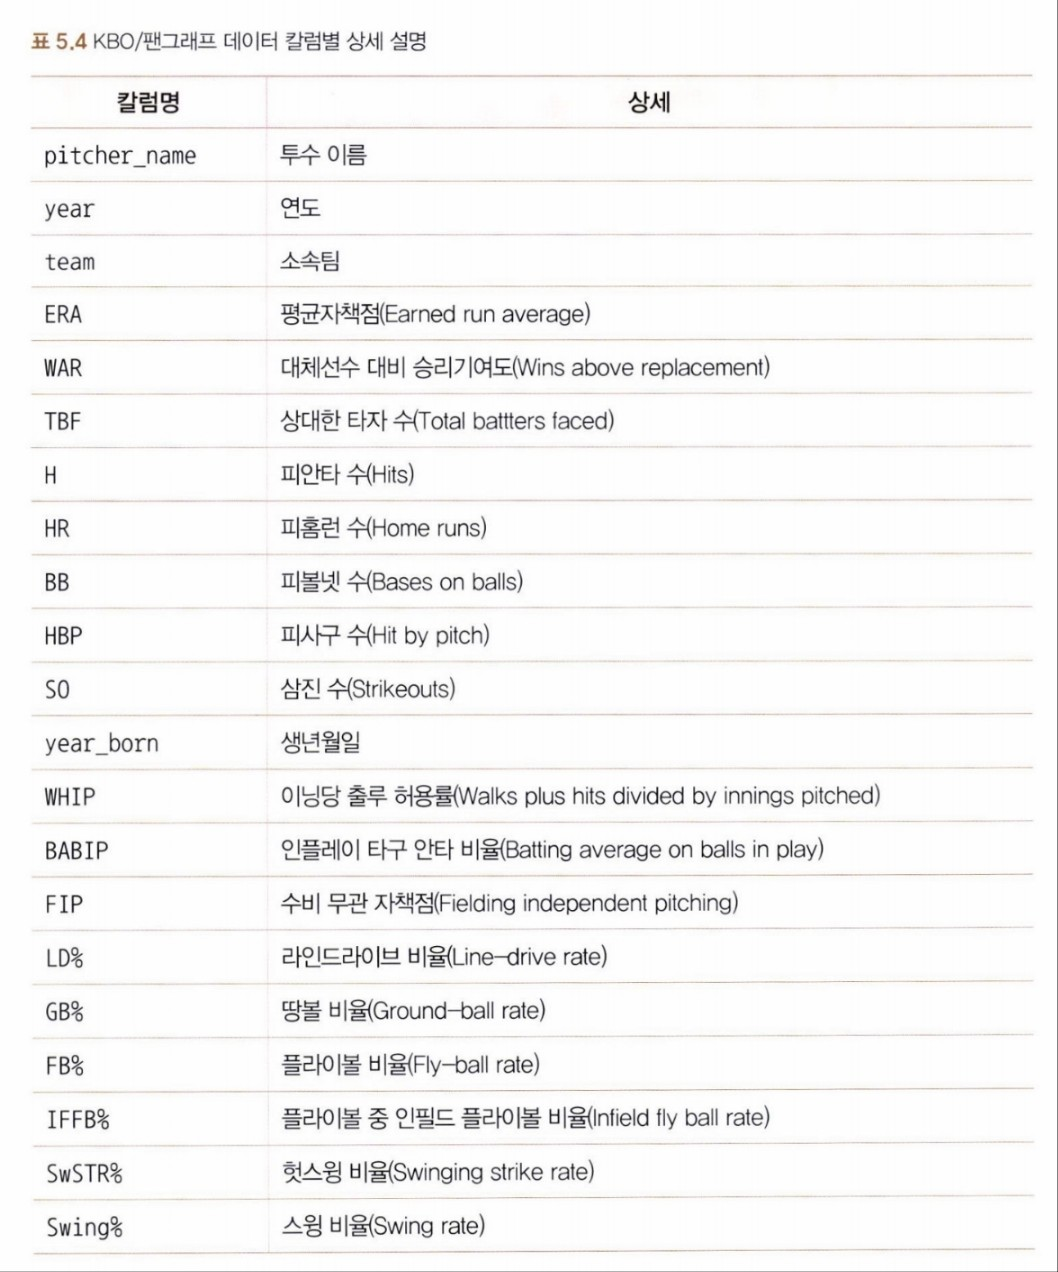

              ERA         TBF
count  105.000000  105.000000
mean     4.714286  558.980952
std      1.733072  224.436816
min      2.380000   40.000000
25%      3.740000  349.000000
50%      4.420000  622.000000
75%      5.230000  758.000000
max     15.750000  870.000000


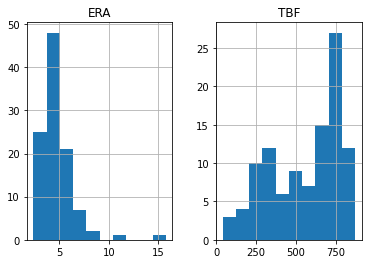

In [7]:
# KBO 정규시즌의 ERA와 TF의 분포 및 기초통계량을 확인

atKbo_11_18_KboRegSsn[['ERA','TBF']].hist()
print(atKbo_11_18_KboRegSsn[['ERA', 'TBF']].describe())

- ERA가 왼쪽에 쏠려 있는 것을 볼 수 있음
- 반면 TBF는 오른쪽에 쏠려있음

              ERA         TBF
count  205.000000  205.000000
mean     5.750585  193.160976
std      3.404285  186.000312
min      0.000000    4.000000
25%      4.050000   57.000000
50%      5.200000  126.000000
75%      6.750000  263.000000
max     27.000000  827.000000


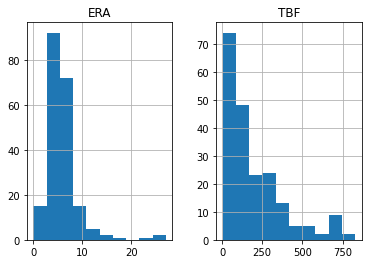

In [8]:
# ERA와 TBF의 분포와 기초통계량 확인
atKbo_11_18_MlbTot[['ERA','TBF']].hist()
print(atKbo_11_18_MlbTot[['ERA','TBF']].describe())

- ERA는 왼쪽으로 쏠려있음
- TF도 왼쪽으로 쏠려 있음
---
MLB에서의 TBF 값의 평균이 KBO보다 낮고 분포 또한 왼쪽으로 몰려있는 이유
- 대부분의 KBO 외국인 투수들이 MLB에서는 선발투수가 아니었기 때문

- ERA가 낮을수록 KBO에서도 낮을 것이라는 것이 증명해야함

In [9]:
# 투수별 각 리그에서의 ERA 평균값

m_mean = (atKbo_11_18_MlbTot.groupby('pitcher_name')['ERA'].mean().reset_index().rename(columns={'ERA':'MLB_mean'}))
k_mean = (atKbo_11_18_KboRegSsn.groupby('pitcher_name')['ERA'].mean().reset_index().rename(columns={'ERA':'KBO_mean'}))

df = pd.merge(m_mean, k_mean, how='inner', on='pitcher_name')

df

,pitcher_name,MLB_mean,KBO_mean
0,니퍼트,4.290000,3.687500
1,다이아몬드,10.262500,4.420000
2,듀브론트,5.106667,4.920000
3,레나도,7.306667,6.800000
4,레온,6.050000,11.250000
5,레이예스,12.956667,5.695000
6,레일리,6.640000,4.197500
7,로저스,5.771667,3.690000
8,루카스,5.687143,4.930000
9,리즈,4.240000,3.543333


          MLB_mean  KBO_mean
MLB_mean  1.000000  0.107744
KBO_mean  0.107744  1.000000


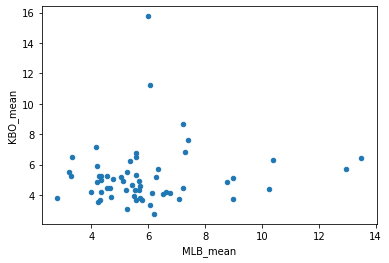

In [10]:
# 데이터 간의 관계 확인

df.plot(kind='scatter', x='MLB_mean', y='KBO_mean')
print(df.corr())

MLB에서의 ERA 평균과 KBO에서의 ERA 평균 간 산점도
- ERA는 작을수록 좋은 수치이지만, 경향을 찾기가 어려움
- 상관계수 또한 낮은 편임

<font color="blue">ERA 지표가 투수 능력뿐만 아니라 투수가 속한 팀의 수비 능력 및 리그의 전반적인 수준에도 영향을 받는 지표이기 때문</font>

## 스탯캐스트 데이터에 기록된 야구 지표 분석

In [14]:
# 데이터 불러오기 및 크기 확인
atKbo_11_18_StatCast = pd.read_csv("drive/MyDrive/Dacon 1/data/baseball_savant_foreigners_2011_2018.csv")

atKbo_19_StatCast = pd.read_csv("drive/MyDrive/Dacon 1/data/baseball_savant_foreigners_2019.csv")

print(atKbo_11_18_StatCast.shape)
print(atKbo_19_StatCast.shape)

(135753, 24)
(21903, 24)


- 행의 개수가 많은 것을 확인
- 스탯캐스트 데이터는 경기에서 해당 투수가 던진 모든 투구별 데이터를 기록한 것이므로 관측치가 많음

In [15]:
print(atKbo_11_18_StatCast.columns)
print(atKbo_19_StatCast.columns)

Index(['game_date', 'release_speed', 'batter', 'pitcher', 'events',
       'description', 'zone', 'stand', 'p_throws', 'bb_type', 'balls',
       'strikes', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'ax', 'ay', 'az',
       'launch_speed', 'launch_angle', 'release_spin_rate', 'pitch_name',
       'pitcher_name'],
      dtype='object')
Index(['game_date', 'release_speed', 'batter', 'pitcher', 'events',
       'description', 'zone', 'stand', 'p_throws', 'bb_type', 'balls',
       'strikes', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'ax', 'ay', 'az',
       'launch_speed', 'launch_angle', 'release_spin_rate', 'pitch_name',
       'pitcher_name'],
      dtype='object')


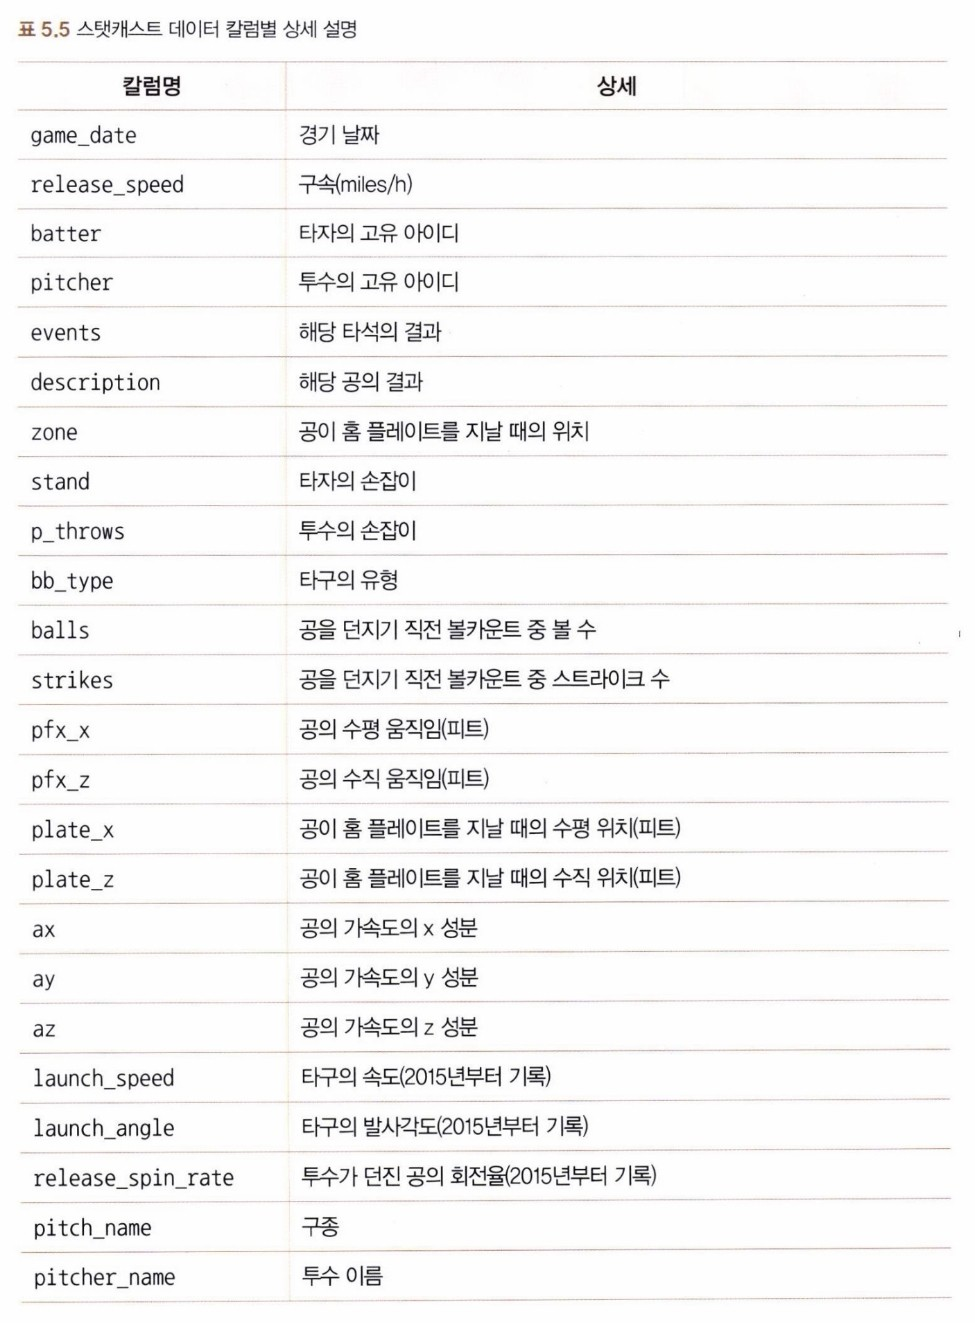

In [16]:
# events, description, pitch_name 탐색

atKbo_11_18_StatCast[['events','description','pitch_name']]

,events,description,pitch_name
0,field_out,hit_into_play,4-Seam Fastball
1,home_run,hit_into_play_score,4-Seam Fastball
2,NaN,foul,4-Seam Fastball
3,NaN,blocked_ball,4-Seam Fastball
4,NaN,ball,4-Seam Fastball
...,...,...,...
135748,NaN,ball,4-Seam Fastball
135749,field_out,hit_into_play,Cutter
135750,NaN,called_strike,Cutter
135751,NaN,ball,4-Seam Fastball


- 해당 칼럼 모두 문자열 값이 들어 있는 것을 확인
- pitch_name은 투수가 던진 투구의 구종명이 기록됨
- description에는 해당 공이 스트라이크, 볼인지 안타인지 기록됨
- events는 해당 타석의 결과


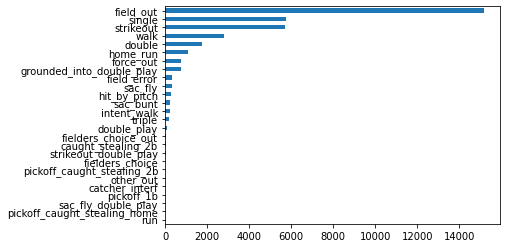

In [17]:
# events 칼럼에 기록된 값들의 분포

(atKbo_11_18_StatCast['events'].value_counts().sort_values(ascending=True).plot(kind='barh'))

- 타석의 결과로 field_out, single, strikeout 등의 문자열이 기록된 것을 확인할 수 있음

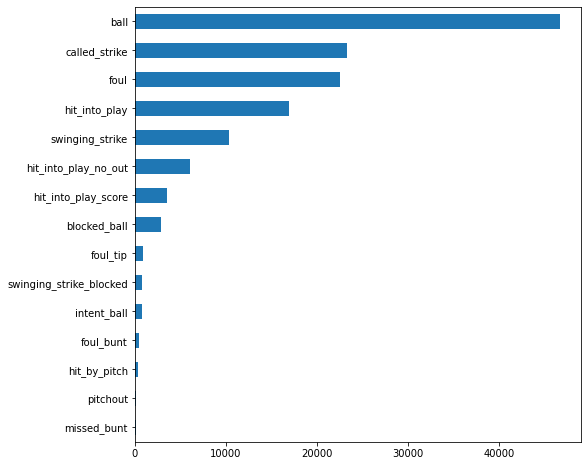

In [18]:
# description 칼럼에 기록된 값들의 분포

(atKbo_11_18_StatCast['description'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(8,8)))

- ball, called_strike, foul 등의 값이 기록됨
- ball의 비중이 5만 개로 많음

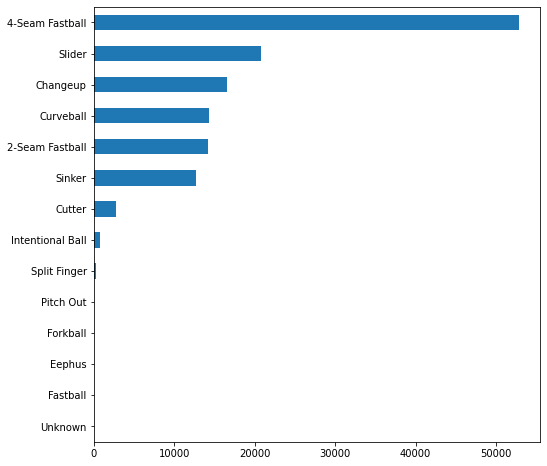

In [20]:
# pitch_name 칼럼에 기록된 값들의 분포

(atKbo_11_18_StatCast['pitch_name'].value_counts().sort_values(ascending=True).plot(kind="barh", figsize=(8,8)))

- Fastball, Slider, Changeup 등의 다양한 구종이 기록됨
- 4-Seam Fastball이 가장 많음

# 데이터 전처리

학습, 검증, 테스트 데이터 3가지로 나눌 수 있음

## 가설을 확인하기 위한 투수 집단 선정하기

논리를 바탕으로 데이터를 분석 진행해 최종 결과물을 도출해야 함

1. 가설 확인의 대상이 되는 투수는 누구인가?
2. KBO 에서의 우수한 활약은 어떻게 측정할 것인가?
3. MLB에서의 제구력은 어떻게 측정할 것인가?

In [21]:
import pandas as pd

#데이터셋 불러오기 

atKbo_11_18_KboRegSsn = pd.read_csv("drive/MyDrive/Dacon 1/data/kbo_yearly_foreigners_2011_2018.csv")

atKbo_11_18_MlbTot = pd.read_csv("drive/MyDrive/Dacon 1/data/fangraphs_foreigners_2011_2018.csv")

atKbo_11_18_StatCast = pd.read_csv("drive/MyDrive/Dacon 1/data/baseball_savant_foreigners_2011_2018.csv")

atKbo_19_MlbTot = pd.read_csv("drive/MyDrive/Dacon 1/data/fangraphs_foreigners_2019.csv")

atKbo_19_StatCast = pd.read_csv("drive/MyDrive/Dacon 1/data/baseball_savant_foreigners_2019.csv")



**2011년부터 2018년까지 KBO에서 활약한 외국인 투수**

|변수명|내용|
|---|---|
|atKbo_11_18_KboRegSsn|역대 KBO 정규시즌 성적|
|ATkbo_11_18_MlbTot|KBO 입성 전, MLB에서의 역대 정규시즌 성적|
|atKbo_11_18_StatCast|KBO 입성 전, MLB에서의 스탯캐스트 데이터|

**2019년 신규 KBO 외국인 투수**

|변수명|내용|
|---|---|
|atKbo_19_MlbTot|MLB에서의 역대 정규시즌 성적|
|atKbo_19_StatCast|MLB에서의 스탯캐스트 데이터|

In [23]:
# 데이터별 사위 10개 행을 확인해보겠음

atKbo_11_18_KboRegSsn.head(10)

,pitcher_name,year,team,ERA,TBF,H,HR,BB,HBP,SO,year_born
0,니퍼트,2011,두산,2.55,763,150,8,64,10,150,NaN
1,니퍼트,2012,두산,3.20,785,156,15,68,8,126,NaN
2,니퍼트,2013,두산,3.58,482,108,7,34,4,104,NaN
3,니퍼트,2014,두산,3.81,760,186,17,48,6,158,NaN
4,니퍼트,2015,두산,5.10,404,104,4,33,4,76,NaN
5,니퍼트,2016,두산,2.95,701,151,15,57,9,142,NaN
6,니퍼트,2017,두산,4.06,782,175,20,77,10,161,NaN
7,니퍼트,2018,KT,4.25,765,209,26,39,9,165,NaN
8,다이아몬드,2017,SK,4.42,581,163,11,35,9,59,NaN
9,듀브론트,2018,롯데,4.92,629,162,13,62,8,109,NaN


In [24]:
# MLB 정규시즌 성적
atKbo_11_18_MlbTot.head(10)

,pitcher_name,year,ERA,WAR,TBF,H,HR,BB,HBP,SO,WHIP,BABIP,FIP,LD%,GB%,FB%,IFFB%,SwStr%,Swing%
0,오간도,2011.0,3.51,3.3,693.0,149.0,16.0,43.0,7.0,126.0,1.14,0.265,3.65,0.237,0.364,0.674,0.147,0.090,0.475
1,험버,2011.0,3.75,3.2,676.0,151.0,14.0,41.0,6.0,116.0,1.18,0.275,3.58,0.168,0.471,0.458,0.094,0.092,0.463
2,루카스,2012.0,3.76,2.8,827.0,185.0,13.0,78.0,1.0,140.0,1.36,0.289,3.75,0.203,0.572,0.707,0.082,0.062,0.424
3,다이아몬드,2012.0,3.54,2.2,714.0,184.0,17.0,31.0,4.0,90.0,1.24,0.292,3.94,0.210,0.534,0.597,0.040,0.068,0.467
4,듀브론트,2013.0,4.32,2.2,705.0,161.0,13.0,71.0,5.0,139.0,1.43,0.310,3.78,0.199,0.456,0.633,0.127,0.077,0.434
5,스와잭,2017.0,2.33,2.2,303.0,58.0,6.0,22.0,2.0,91.0,1.03,0.286,2.74,0.155,0.439,0.485,0.145,0.142,0.500
6,듀브론트,2012.0,4.86,1.3,709.0,162.0,24.0,71.0,5.0,167.0,1.45,0.312,4.37,0.234,0.437,0.635,0.086,0.096,0.442
7,탈보트,2010.0,4.41,1.2,696.0,169.0,13.0,69.0,8.0,88.0,1.49,0.301,4.48,0.169,0.478,0.495,0.070,0.060,0.428
8,비야누에바,2011.0,4.04,1.2,454.0,103.0,11.0,32.0,4.0,68.0,1.26,0.271,4.10,0.219,0.356,0.462,0.151,0.078,0.433
9,비야누에바,2014.0,4.64,1.2,343.0,89.0,6.0,19.0,3.0,72.0,1.39,0.342,3.13,0.202,0.413,0.474,0.161,0.113,0.486


In [25]:
# 스탯캐스트에 기록된 값
atKbo_11_18_StatCast.head(10)

,game_date,release_speed,batter,pitcher,events,description,zone,stand,p_throws,bb_type,...,plate_x,plate_z,ax,ay,az,launch_speed,launch_angle,release_spin_rate,pitch_name,pitcher_name
0,2010-10-09,93.0,425834.0,430962,field_out,hit_into_play,4.0,R,R,popup,...,-0.626,2.771,-6.404,26.077,-9.694,NaN,NaN,NaN,4-Seam Fastball,니퍼트
1,2010-10-09,95.2,150289.0,430962,home_run,hit_into_play_score,5.0,L,R,fly_ball,...,-0.112,2.401,-10.168,28.786,-8.895,NaN,NaN,NaN,4-Seam Fastball,니퍼트
2,2010-10-09,94.3,150289.0,430962,NaN,foul,2.0,L,R,NaN,...,0.272,3.052,-5.605,26.657,-7.794,NaN,NaN,NaN,4-Seam Fastball,니퍼트
3,2010-10-09,94.0,150289.0,430962,NaN,blocked_ball,13.0,L,R,NaN,...,-1.193,0.632,-9.099,30.273,-6.371,NaN,NaN,NaN,4-Seam Fastball,니퍼트
4,2010-10-09,92.8,150289.0,430962,NaN,ball,14.0,L,R,NaN,...,0.370,1.383,-5.846,27.290,-11.262,NaN,NaN,NaN,4-Seam Fastball,니퍼트
5,2010-10-09,80.8,150289.0,430962,NaN,foul_tip,13.0,L,R,NaN,...,-1.233,2.059,-10.897,18.539,-20.286,NaN,NaN,NaN,Changeup,니퍼트
6,2010-10-09,92.0,150289.0,430962,NaN,ball,9.0,L,R,NaN,...,0.510,1.722,-6.251,27.786,-10.031,NaN,NaN,NaN,4-Seam Fastball,니퍼트
7,2010-10-09,92.5,430632.0,430962,field_out,hit_into_play,13.0,L,R,line_drive,...,-1.010,2.212,-8.279,26.466,-8.376,NaN,NaN,NaN,4-Seam Fastball,니퍼트
8,2010-10-09,91.2,430632.0,430962,NaN,ball,13.0,L,R,NaN,...,-0.106,1.418,-9.239,25.490,-13.556,NaN,NaN,NaN,4-Seam Fastball,니퍼트
9,2010-10-09,91.8,430632.0,430962,NaN,ball,11.0,L,R,NaN,...,-1.426,2.971,-12.090,25.659,-15.250,NaN,NaN,NaN,2-Seam Fastball,니퍼트


In [27]:
# 데이터별 고유 투수 이름 확인

print('KBO:',len(atKbo_11_18_KboRegSsn['pitcher_name'].unique()))
print('MLB:',len(atKbo_11_18_MlbTot['pitcher_name'].unique()))
print('StatCast', len(atKbo_11_18_StatCast['pitcher_name'].unique()))

KBO: 62
MLB: 60
StatCast 60


MLB와 KBO 모두 기록된 선수가 필요함

In [30]:
target = (set(atKbo_11_18_KboRegSsn['pitcher_name']) & 
          set(atKbo_11_18_MlbTot['pitcher_name']) & 
          set(atKbo_11_18_StatCast['pitcher_name']))

print(target)
print(type(target))

target = sorted(list(target))

print(type(target))
print(target)
print(len(target))

{'레일리', '니퍼트', '오설리반', '올슨', '코프랜드', '볼스테드', '다이아몬드', '서캠프', '보우덴', '피어밴드', '듀브론트', '울프', '산체스', '이브랜드', '보니야', '린드블럼', '루카스', '세든', '레온', '맨쉽', '팻딘', '플란데', '베렛', '레나도', '레이예스', '헥터', '윌슨', '샘슨', '험버', '앨버스', '클로이드', '티포드', '로저스', '비야누에바', '에반', '코엘로', '허프', '스틴슨', '헤일', '오간도', '어센시오', '아담', '소사', '토마스', '웨버', '지크', '마야', '휠러', '탈보트', '어윈', '피가로', '아델만', '후랭코프', '피노', '웹스터', '스와잭', '해커'}
<class 'set'>
<class 'list'>
['니퍼트', '다이아몬드', '듀브론트', '레나도', '레온', '레이예스', '레일리', '로저스', '루카스', '린드블럼', '마야', '맨쉽', '베렛', '보니야', '보우덴', '볼스테드', '비야누에바', '산체스', '샘슨', '서캠프', '세든', '소사', '스와잭', '스틴슨', '아담', '아델만', '앨버스', '어센시오', '어윈', '에반', '오간도', '오설리반', '올슨', '울프', '웨버', '웹스터', '윌슨', '이브랜드', '지크', '코엘로', '코프랜드', '클로이드', '탈보트', '토마스', '티포드', '팻딘', '플란데', '피가로', '피노', '피어밴드', '해커', '허프', '험버', '헤일', '헥터', '후랭코프', '휠러']
57


파이썬에서는 set 타입에 대해 집합 연산을 지원함

In [33]:
atKbo_11_18_KboRegSsn

,pitcher_name,year,team,ERA,TBF,H,HR,BB,HBP,SO,year_born
0,니퍼트,2011,두산,2.55,763,150,8,64,10,150,NaN
1,니퍼트,2012,두산,3.20,785,156,15,68,8,126,NaN
2,니퍼트,2013,두산,3.58,482,108,7,34,4,104,NaN
3,니퍼트,2014,두산,3.81,760,186,17,48,6,158,NaN
4,니퍼트,2015,두산,5.10,404,104,4,33,4,76,NaN
...,...,...,...,...,...,...,...,...,...,...,...
100,후랭코프,2018,두산,3.74,621,118,12,55,22,134,1988년 08월 27일
101,휠러,2018,한화,5.13,459,128,12,34,10,94,NaN
102,산체스,2018,SK,4.89,632,161,26,39,7,124,1989년 11월 28일
103,윌슨,2018,LG,3.07,689,158,11,35,6,149,1989년 09월 25일


In [32]:
atKbo_11_18_KboRegSsn.query('pitcher_name in @target')

,pitcher_name,year,team,ERA,TBF,H,HR,BB,HBP,SO,year_born
0,니퍼트,2011,두산,2.55,763,150,8,64,10,150,NaN
1,니퍼트,2012,두산,3.20,785,156,15,68,8,126,NaN
2,니퍼트,2013,두산,3.58,482,108,7,34,4,104,NaN
3,니퍼트,2014,두산,3.81,760,186,17,48,6,158,NaN
4,니퍼트,2015,두산,5.10,404,104,4,33,4,76,NaN
...,...,...,...,...,...,...,...,...,...,...,...
100,후랭코프,2018,두산,3.74,621,118,12,55,22,134,1988년 08월 27일
101,휠러,2018,한화,5.13,459,128,12,34,10,94,NaN
102,산체스,2018,SK,4.89,632,161,26,39,7,124,1989년 11월 28일
103,윌슨,2018,LG,3.07,689,158,11,35,6,149,1989년 09월 25일


In [31]:
# 투수별로 KBO 첫 번째 시즌의 데이터를 추출하는 코드

_idx = atKbo_11_18_KboRegSsn.query('pitcher_name in @target').groupby('pitcher_name')['year'].idxmin().values
firstYearInKBO_11_18 = atKbo_11_18_KboRegSsn.loc[_idx, :]
firstYearInKBO_11_18.head()

,pitcher_name,year,team,ERA,TBF,H,HR,BB,HBP,SO,year_born
0,니퍼트,2011,두산,2.55,763,150,8,64,10,150,NaN
8,다이아몬드,2017,SK,4.42,581,163,11,35,9,59,NaN
9,듀브론트,2018,롯데,4.92,629,162,13,62,8,109,NaN
10,레나도,2017,삼성,6.80,243,70,11,27,6,28,NaN
11,레온,2016,삼성,11.25,40,16,2,1,1,7,NaN


@을 사용하면 현재 환경에 있는 target 변수에 접근할 수 있음

## 유효한 데이터 선정하기

앞에서 추출한 데이터는 모든 투수의 기록이 유효하지는 않음

- 투수의 활약상을 평가할 때는 대표적으로 쓰이는 지표는 평균자책점임
  - 낮을수록 좋음
  - 투수가 상대한 타자의 수에 영향을 받는 지표임

<font color="red">시행 횟수가 충분하지 않으면 평균자책점이 신뢰성 있다고 보기에는 어려움</font>

'Garbage In Garbage Out'이론에 기반해 상대한 타자 수가 특정 횟수 이상인 기록만 추출

- 특정 횟수는 타깃 집단 투수의 TBF의 중앙값으로 정의하겠음
- TBF 특성상 분산이 커서 평균으로 할 경우 이상치에 영향을 받기 때문임
- ERA도 마찬가지로 추출

In [34]:
# TBF가 중앙값 이상이며 ERA가 중앙값 이하인 투수를 추출

TBF_median = firstYearInKBO_11_18['TBF'].median()
ERA_median = firstYearInKBO_11_18['ERA'].median()
Elite_11_18 = firstYearInKBO_11_18.query('TBF >= @TBF_median & ERA <= @ERA_median')
Elite_11_18

,pitcher_name,year,team,ERA,TBF,H,HR,BB,HBP,SO,year_born
0,니퍼트,2011,두산,2.55,763,150,8,64,10,150,NaN
8,다이아몬드,2017,SK,4.42,581,163,11,35,9,59,NaN
12,레이예스,2013,SK,4.84,751,157,15,91,7,135,NaN
14,레일리,2015,롯데,3.91,768,182,20,57,15,134,1988년 06월 29일
25,린드블럼,2015,롯데,3.56,861,196,28,52,12,180,1987년 06월 15일
37,보우덴,2016,두산,3.80,742,159,17,54,6,160,NaN
43,샘슨,2018,한화,4.68,703,144,17,79,5,195,NaN
45,세든,2013,SK,2.98,780,169,14,73,11,160,NaN
48,소사,2012,KIA,3.54,614,137,9,39,8,104,NaN
67,웨버,2014,NC,4.58,512,132,13,42,3,85,NaN


18명의 투수가 유효하게 우수한 투수임

# 모델 구축과 검증

투수 개인의 능력이 뛰어날수록 좋은 성적을 낼 것임
- 해당 능력을 객관적으로 평가하는 지표가 필요

## 선형회귀분석

선형회귀분석을 통해 밝혀낼 것임
- MLB 데이터는 연도별 통계 지표와 투구별 지표가 존재함
  - 연도별 통계 지표가 기록된 팬그래프 데이터를 활용해 KBO 입성 전 투수의 특성을 밝히는 것은 제한적임
    - 투수의 고유 능력을 대변할 수 있는 지표가 없기 때문
  - 팬그래프 데이터셋에 기록된 지표들은 소속팀의 수비 능력이나 리그 수준, 또는 경기장 요인에 영향을 받으므로 투수의 고유 능력을 대표하는 지표로 사용하기에는 제한적임
---
- 투수의 제구력은 외부 요인의 영향을 받지 않는 투수 고유의 능력이라고 볼 수 있음
- 객관적으로 평가할 수 있는 지표임


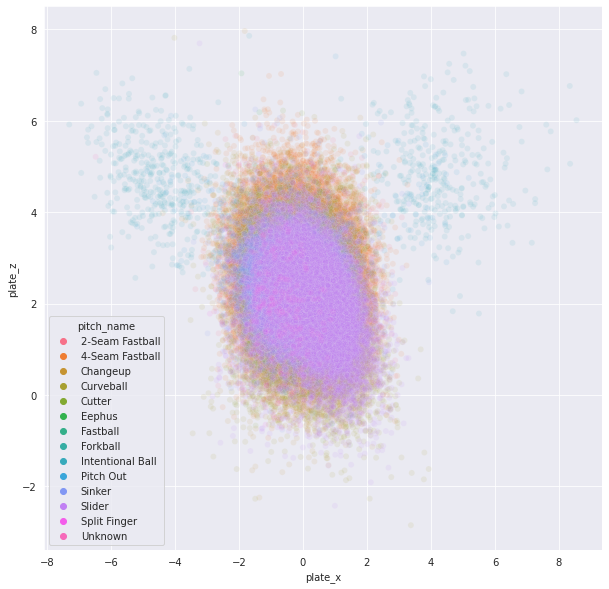

In [36]:
# 홈 플레이트를 지날 때의 위치를 시각화하는 코드

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.set_style('darkgrid')
sns.scatterplot(data=atKbo_11_18_StatCast.sort_values('pitch_name'), x='plate_x', y='plate_z', hue='pitch_name', alpha=0.1)
plt.show()

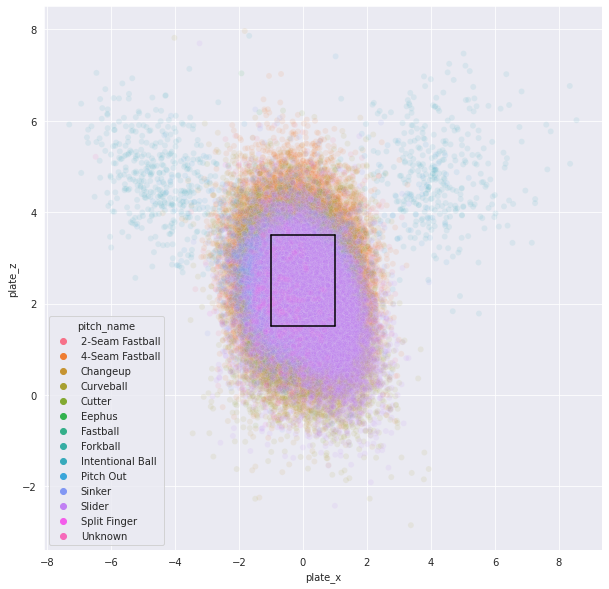

In [37]:
# 스트라이크 존 시각화

plt.figure(figsize=(10, 10))
sns.set_style('darkgrid')
sns.scatterplot(data=atKbo_11_18_StatCast.sort_values('pitch_name'), x='plate_x', y='plate_z', hue='pitch_name', alpha=0.1)
plt.plot([-1, -1], [1.5, 3.5], 'black')
plt.plot([1, 1], [1.5, 3.5], 'black')
plt.plot([-1, 1], [1.5, 1.5], 'black')
plt.plot([-1, 1], [3.5, 3.5], 'black')
plt.show()

상당히 벗어난 것은 고의 사구나 피치아웃일 가능성이 있음

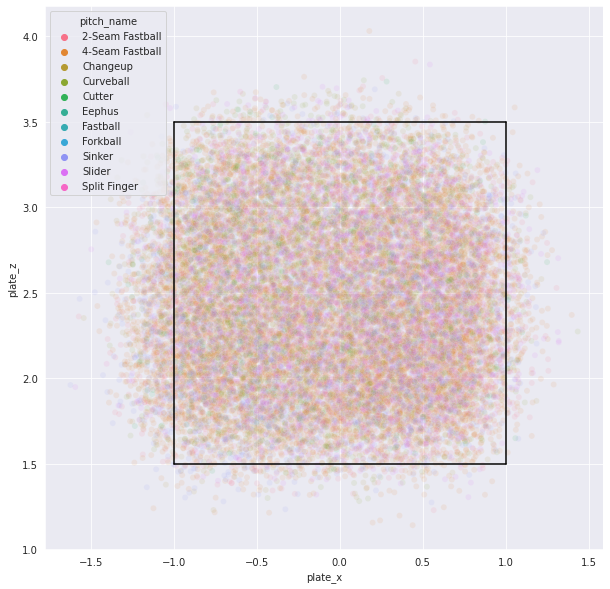

In [38]:
# called_strike 투구 시각화
plt.figure(figsize=(10, 10))
sns.set_style('darkgrid')
sns.scatterplot(data=(atKbo_11_18_StatCast.sort_values('pitch_name').query('description == "called_strike"')),
                x='plate_x', y='plate_z', hue='pitch_name', alpha=0.1)
plt.plot([-1, -1], [1.5, 3.5], 'black')
plt.plot([1, 1], [1.5, 3.5], 'black')
plt.plot([-1, 1], [1.5, 1.5], 'black')
plt.plot([-1, 1], [3.5, 3.5], 'black')
plt.show()

궤적이 스트라이크 존 가장자리에 있는 투구들이 제구력이 잘 반영된 투구라고 정의할 수 있음

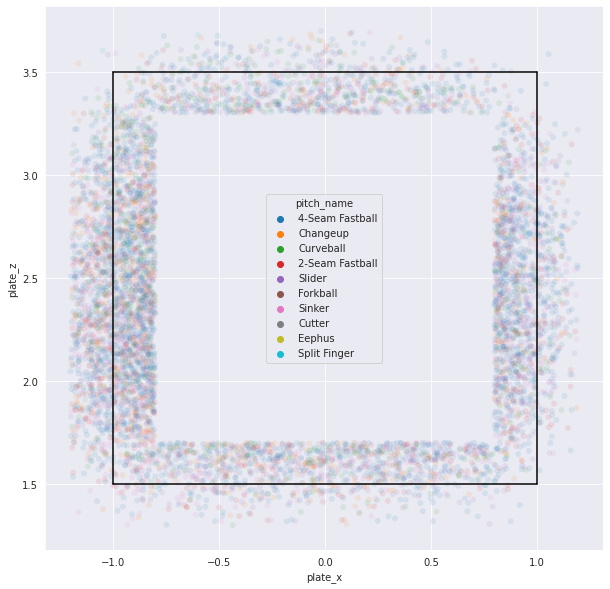

In [40]:
# 스트라이크 존 밖으로 위치할 것처럼 날아오다가 변하여 스트라이크 존에 걸친 투구들 추출

edgePitches = \
(atKbo_11_18_StatCast.query(
    '(plate_x >= 0.8 & plate_x <= 1.2 & plate_z <= 3.7 & plate_z >= 1.3) | \
    (plate_x <= -0.8 & plate_x >= -1.2 & plate_z <= 3.7 & plate_z >= 1.3) | \
    (plate_x >= -0.8 & plate_x <= 0.8 & plate_z <= 1.7 & plate_z >= 1.3) | \
    (plate_x >= -0.8 & plate_x <= 0.8 & plate_z <= 3.7 & plate_z >= 3.3)').query('pitch_name.notnull()', engine='python').query('description == "called_strike"'))

plt.figure(figsize=(10, 10))
sns.set_style('darkgrid')
sns.scatterplot(data=edgePitches,
                x='plate_x',
                y='plate_z',
                hue='pitch_name',
                alpha=0.1)
plt.plot([-1, -1], [1.5, 3.5], 'black')
plt.plot([1, 1], [1.5, 3.5], 'black')
plt.plot([-1, 1], [1.5, 1.5], 'black')
plt.plot([-1, 1], [3.5, 3.5], 'black')
plt.show()

가장자리에 대한 정의 : 측면당 스트라이크 존 크기의 20%만큼 가장자리를 부여함


해당 범위에 속하는 called_strike 투구들을 추출해 edgePitches 변수에 저장함
- pitch_name 칼럼에 결측치가 존재하는 경우는 삭제함
  - 결측값이 포함돼 있으면 구종별 비율 산정에 영향을 미치기 때문
---
called_strike된 투구 중 투구 구종 비율이 10%가 넘는 것을 유효한 구종이라고 정의할 것
- 스트라이크 존 가장자리에 위치하는 투구 중 우연히 들어온 것도 있을 수 있기 때문에 배제함
- 정의한 조건에 해당하는 구종의 개수가 많다는 것은 그만큼 제구력이 뛰어나다고 볼 수 있음


In [41]:
(edgePitches[['pitcher_name','pitch_name','game_date']].groupby(['pitcher_name','pitch_name']).count().head(10))

game_date
pitcher_name pitch_name                
니퍼트          2-Seam Fastball          1
             4-Seam Fastball         18
             Changeup                 3
             Curveball                3
다이아몬드        2-Seam Fastball          7
             4-Seam Fastball        155
             Changeup                10
             Curveball               36
듀브론트         2-Seam Fastball         80
             4-Seam Fastball        194

In [42]:
# 투구들의 상대적인 비율을 산출

(edgePitches[['pitcher_name', 'pitch_name', 'game_date']].groupby(['pitcher_name','pitch_name']).count().groupby('pitcher_name').apply(lambda x: x / x.sum()).head(10))

game_date
pitcher_name pitch_name                
니퍼트          2-Seam Fastball   0.040000
             4-Seam Fastball   0.720000
             Changeup          0.120000
             Curveball         0.120000
다이아몬드        2-Seam Fastball   0.033654
             4-Seam Fastball   0.745192
             Changeup          0.048077
             Curveball         0.173077
듀브론트         2-Seam Fastball   0.209424
             4-Seam Fastball   0.507853

0.1보다 작은 것은 우연에 의한 산출이라 판단하여 제하겠음

In [43]:
(edgePitches[['pitcher_name', 'pitch_name', 'game_date']].groupby(['pitcher_name','pitch_name']).count().groupby('pitcher_name').apply(lambda x: x / x.sum()).query('game_date >= 0.1').head(10))

game_date
pitcher_name pitch_name                
니퍼트          4-Seam Fastball   0.720000
             Changeup          0.120000
             Curveball         0.120000
다이아몬드        4-Seam Fastball   0.745192
             Curveball         0.173077
듀브론트         2-Seam Fastball   0.209424
             4-Seam Fastball   0.507853
             Changeup          0.107330
             Curveball         0.102094
레나도          4-Seam Fastball   0.631579

In [44]:
# 완성된 코드

coordEdge = (edgePitches[['pitcher_name', 'pitch_name', 'game_date']].groupby(['pitcher_name','pitch_name']).count().groupby('pitcher_name').apply(lambda x: x / x.sum()).query('game_date >= 0.1').groupby('pitcher_name').count())

coordEdge = coordEdge.reset_index().rename(columns={'game_date': 'num_pitches'})

coordEdge.head()

,pitcher_name,num_pitches
0,니퍼트,3
1,다이아몬드,2
2,듀브론트,4
3,레나도,2
4,레온,2


- 니퍼트가 제어 가능한 구종은 3개고 다이아몬드는 2개임

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


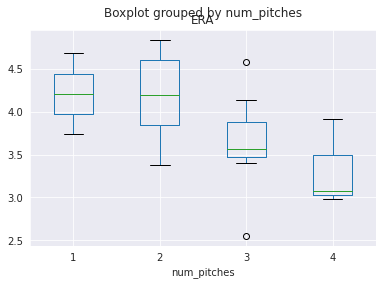

In [45]:
Elite_11_18 = Elite_11_18.reset_index()
Elite_11_18 = Elite_11_18.merge(coordEdge, on='pitcher_name')
Elite_11_18.boxplot('ERA', 'num_pitches')

<font color="red">제구력이 높아질수록 평균자책점이 감소하는 것을 볼 수 있음

선형회귀분석은 독립변수가 종속변수에 미치는 영향력을 파악하는 통계적 분석 방법임
- p-value가 0.05이하면 유의한 분석 결과가 나왔다고 볼 수 있음

In [46]:
import statsmodels.api as sm

y = Elite_11_18.ERA.values
X = sm.add_constant(Elite_11_18.num_pitches.values)

model = sm.OLS(y, X)
result = model.fit()
result.summary()

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     5.861
Date:                Mon, 20 Feb 2023   Prob (F-statistic):             0.0277
Time:                        06:17:55   Log-Likelihood:                -14.248
No. Observations:                  18   AIC:                             32.50
Df Residuals:                      16   BIC:                             34.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7731      0.414     11.543      0.000       3.896       5.650
x1            -0.3629      0.150     -2.421      0.028      -0.681      -0.045
==============================================================================
Omnibus:                        0.141   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.932   Jarque-Bera (JB):                0.346
Skew:                          -0.120   Prob(JB):                        0.841
Kurtosis:                       2.365   Cond. No.                         9.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

독립변수인 x1의 계수가 -0.3629로 계산됨
- 제구력 지표가 1상승할 때 마다 ERA가 평균적으로 0.3629만큼 감소한다고 해석할 수 있음
- p-value가 0.028으로 0.05보다 작으므로 유의하다고 볼 수 있음